# Проект

Цель работы — выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Ход работы:
1. Изучение общей информации о датасете
2. Подготовка данных к исследованию
3. Исследовательский анализ
4. Составление портрета пользователя
5. Формирование и проверка гипотез
6. Общий вывод

В данных предсавлены игры, их год выпуска, платформа, на которой они размещены, оценки, рейтинг по ESRB и объем продаж в регионах.

Рейтинг по ESRB — рейтинг для компьютерных видеоигр в США и Канаде. 
E — для всех

Е10+ — от 10 и старше

М — от 17 и страше

Т - от 13 и старше

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

## Обзор датасета

### Вывод данных  и информации о них

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод:
В данных 16715 строк и 11 столбцов.

В данных представлены названия игр, год выпуска и платформа, жанр и количество продаж по регионам, ретинг и оценки критиков и пользователей.

В данных есть пропуски.

Не у всех данных верный тип.

## Подготовка данных

Необходимо обработать данные перед исследованием:заменить названия столбцов, изменить типы данных, заполнить пропуски там, где это возможно, проверить нет ли дубликатов. Сформулировать вывод.

### Изменение регистра в колонках

In [4]:
#Приводим названия столбцов к нижнему регистру
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Все названия колонок теперь в нижнем регистре

### Проверка дубликатов

In [6]:
data.duplicated(subset = ['platform', 'name', 'year_of_release']).sum()

2

In [7]:
data[data.duplicated(subset = ['platform', 'name', 'year_of_release'], keep=False)].sort_values(by=['platform', 'name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [8]:
#Удаляем дубликаты и сбрасываем индекс
data = data.drop_duplicates(subset=['platform', 'name', 'year_of_release'], keep='first')
data = data.reset_index(drop=True)

### Заполнение пропусков в данных

In [9]:
#Сначала посмотрим сколько пропусков в столбцах
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [10]:
#Удялим пропуски
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [12]:
#Данные в столбце user_score не определены, заменяем их на Nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan') 

In [13]:
#Сбрасываем индекс после всех удалений
data = data.reset_index(drop=True)

Все пропуски, которые не важны для дальнейшего исследования удалены

В столбце rating заполним пропуски заглушкой "unknown"

In [14]:
data['rating'] = data['rating'].fillna('unknown')
data['rating'].isna().sum()

0

Столбцы critic_score, user_score остались с пропусками, так как пропусков в них более 50% и это может повлиять на анализ в дальнейшем

### Изменение типов данных

In [15]:
#год выхода — данным нужен тип datatime
data['year_of_release'] = data['year_of_release'].astype('int')

#оценка пользователей не может быть в текстовом формате, это должно быть число
data['user_score'] = pd.to_numeric(data['user_score']) 

Что у нас получилось в итоге:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Добавление столбца с общей суммой продаж

In [17]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Вывод:

Данные подготовлены к анализу.

Названия колонок приведены к нижнему регистру, заполнены пропуски в столбце с годом выпуск игры, рейтингом.float64 

Удалены дубликаты в датасете.

Изменены типы данных: переведены в datatime из float64, в float64 из object, в int из float64.

После предобработки данных количество строк сократилось с 16715 до 16441 строк.

Добавлен столбец с общей суммой продаж.

Заполнены пропуски, где это возможно.

Возможные причины пропусков:

1. Игра не стала такой популярной, поэтому люди не поставили никакую оценку.
2. Человечский фактор — люди в ппринципе не очень любят ставть оценки, это занимает их время.
3. Ошибка выгрузки: что-то могло пойти не так.
4. В столбце рейтинг в некоторых строках нет данных, так как ретинг присвоем играм по ESRB, который предназначем для США и Канады. Значит игры продаются не только на эти 2 рынка.

In [18]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  all_sales        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ 

Наэтом шаге необходимо провести исследовательский анализ данных.
Анализируем следующие показатели:

- Сколько игр выпускалось в разные годы

- Как менялись продажи по платформам

- Какой актуальный период для прогноза на 2017 год

- Какие платформы лидируют по продажам, растут или падают

- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

- Какие жанры лидируют по продажам, растут или падают

- Какого на общее распределение игр по жанрам

- Сделать вывод

### Сколько игр выпускалось в разные годы

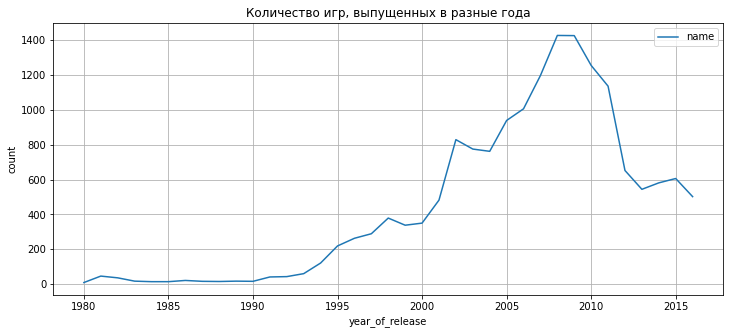

In [19]:
#Построим график, где будет видно с каком году сколько было выпущено игр
(data
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(grid=True, figsize=(12, 5), title = 'Количество игр, выпущенных в разные года')
    
)
plt.xlabel('year_of_release') 
plt.ylabel('count')
plt.show()

На графике видно, что рост выпуска игр начался в 1990 году, а пик пришелся на 2008 и 2009 годы.

In [20]:
#Посмотрим, какие платформы больше всего продали игр в пиковые годы
(data
    .query('year_of_release == [2008, 2009]')
    .pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False)
)

,all_sales
platform,
Wii,378.29
DS,264.85
X360,255.55
PS3,249.45
PS2,80.30
PSP,72.33
PC,29.33
XB,0.18
DC,0.04


In [21]:
#Построим такую же сводную по жанрам
(data
    .query('year_of_release == [2008, 2009]')
    .pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False)
)

,all_sales
genre,
Action,272.65
Sports,231.95
Misc,161.87
Shooter,128.45
Role-Playing,106.29
Racing,103.73
Simulation,79.03
Platform,75.66
Fighting,66.92


В 90-х игры стали выпускаться чаще, но тогда студенты еще не родились.

Так же по графику видно, что резкий рос начался с 2000-х, поэтому будем учитывать данные после 2000-х.

Пик был в 2009 году, а самой популряной платформой для игр были Wii, DS, PS3 и X360.

Популярными жанрами были: Action и Sports.

In [22]:
data = data.query('year_of_release > 1999')

### Как менялись продажи по платформам

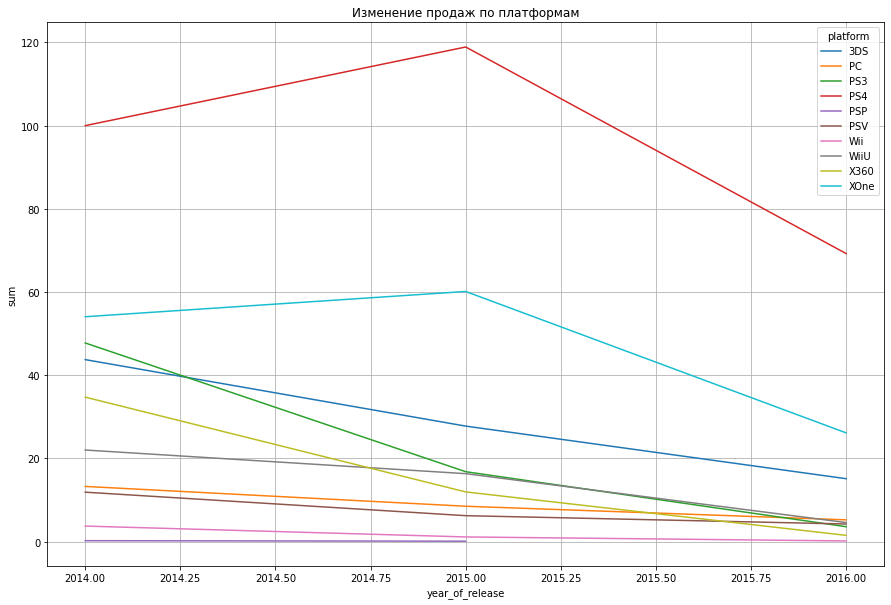

In [59]:
#Построим график, отражающий изменение продаж по платформам
(data
    .pivot_table(index='year_of_release', values='all_sales', columns='platform', aggfunc='sum')
    .plot(grid=True, figsize=(15, 10), title = 'Изменение продаж по платформам')
)
plt.xlabel('year_of_release') 
plt.ylabel('sum')
plt.show()

In [24]:
#Определяем популярные платформы
top_platform = data.groupby('platform').sum()['all_sales'].sort_values(ascending=False)
top_platform

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       205.72
GC       196.73
XOne     159.32
PS       140.70
WiiU      82.19
PSV       53.81
N64       37.30
GB        29.00
DC         7.41
WS         0.96
Name: all_sales, dtype: float64

In [25]:
#Топ платформ по продажам за все время, начиная с 2000 года:
anti_top = ['DC', 'WS']  
top = data.query('platform != @anti_top')

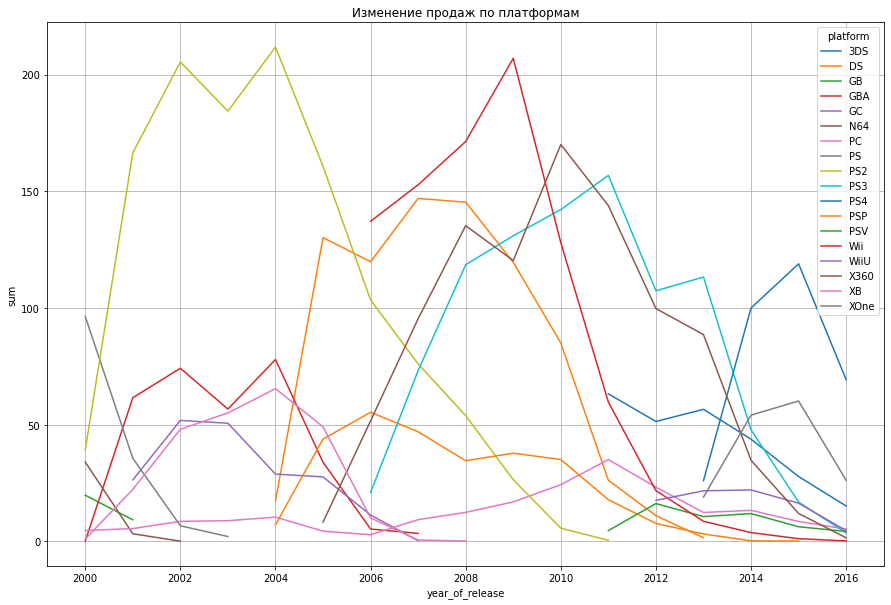

In [60]:
#Построим график по распределинию продаж по популярным платформам
(top
    .pivot_table(index='year_of_release', values='all_sales', columns='platform', aggfunc='sum')
    .plot(grid=True, figsize=(15, 10), title = 'Изменение продаж по платформам')
)
plt.xlabel('year_of_release') 
plt.ylabel('sum')
plt.show()

Топ-3 платформы, котоые лидируют по продажам с 2000 года — PS2, X360, PS3

### Какой актуальный период для прогноза на 2017 год

In [27]:
#Определяем срок жизни платформ на основе минимального объема выручки
min_sales = 50
life_platform = data.groupby(['platform','year_of_release']).agg({'all_sales':'sum'}).reset_index()
life_platform = life_platform.query('all_sales > @min_sales')
life_platform = life_platform.groupby(['platform']).agg({'year_of_release':'nunique'}).rename(columns = {'year_of_release':'lifetime'})
median_platform_lifetime = int(life_platform.median()[0])
print('Медианное время жизни платформы при уровне мин. продаж {} млн. составляет {} года'.format(min_sales, median_platform_lifetime))

Медианное время жизни платформы при уровне мин. продаж 50 млн. составляет 3 года


Для дальнейшего исследования берем данные за последние 3 года

In [28]:
data = data.query('year_of_release > 2013')

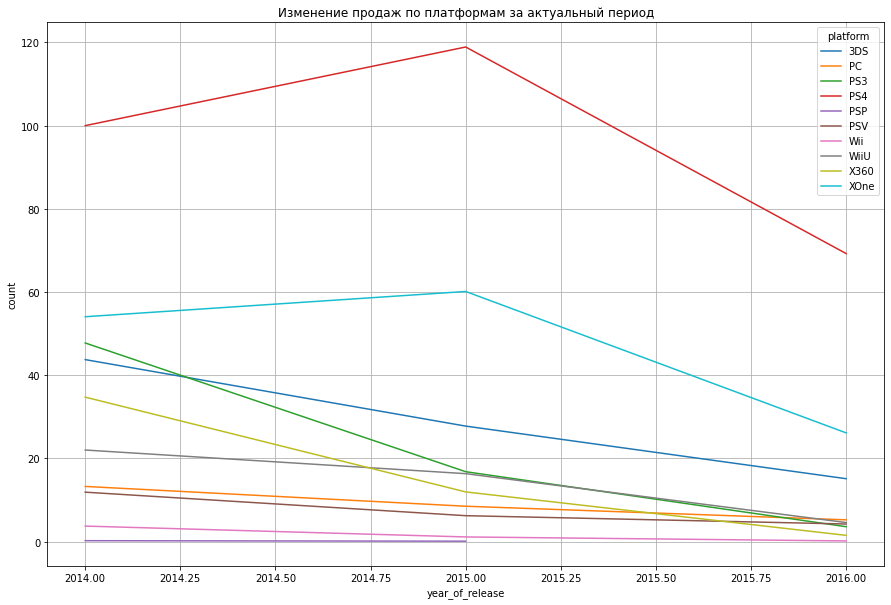

In [61]:
#Строим график продаж за актуальный период
(data
    .pivot_table(index='year_of_release', values='all_sales', columns='platform', aggfunc='sum')
    .plot(grid=True, figsize=(15, 10), title = 'Изменение продаж по платформам за актуальный период')
)
plt.xlabel('year_of_release') 
plt.ylabel('count')
plt.show()

Самые популярные платформы за последние годы — PS4 и  XOne.

Причем PS4 до 2015 года стремительно набирала популярность, XOne тоже увеличила свои продажи, но не так существенно. Остальные теряли рынок.


### Какие платформы лидируют по продажам

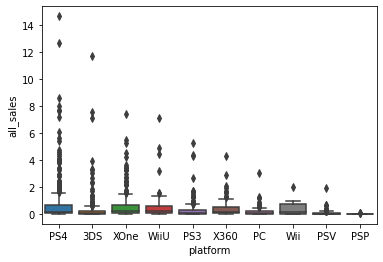

In [63]:
#Построим график выбросов продаж со всеми выбросами
sns.boxplot(x='platform', y='all_sales', data=data)
plt.show()

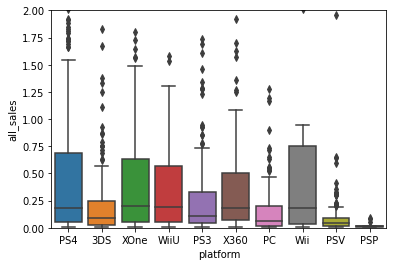

In [62]:
#Построим график выбросов крупными боксплотами для сравнения
sns.boxplot(x='platform', y='all_sales', data=data)
plt.ylim(0, 2)
plt.show()

In [32]:
#Посмотрим точные значения в таблице
data.pivot_table(index='platform', values='all_sales', aggfunc='median').sort_values('all_sales')

,all_sales
platform,
PSP,0.020
PSV,0.040
PC,0.060
3DS,0.090
PS3,0.110
Wii,0.180
X360,0.180
PS4,0.185
WiiU,0.190


Самое высокое значение у XOne — 0.205, игры продавались равномернее всего и если не учитывать выбросы это платформа популярнее всех остальных
Далее WiiU, PS4, X360 и Wii

Получается у нас 2 популярные платформы: PS4 и XOne

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [33]:
#Проверяем как влиют оценки пользователей на продажи
def corr_score_user(data, game_platform):
    data.query('platform == @game_platform').plot(x='user_score', y='all_sales', 
                                     kind='scatter', 
                                     figsize=(12, 5), 
                                     title = 'Влияние оценок пользователей на продажи игр на {}'.format(game_platform))
    return data.query('platform == @game_platform')[['user_score', 'all_sales']].corr()
    
                                                    

In [34]:
#Проверяем как влиют оценки критиков на продажи
def corr_score_critic(data, game_platform):
    data.query('platform == @game_platform').plot(x='critic_score', y='all_sales', 
                                     kind='scatter', 
                                     figsize=(12, 5), 
                                     title = 'Влияние оценок критиков на продажи игр на {}'.format(game_platform))
    return data.query('platform == @game_platform')[['critic_score', 'all_sales']].corr()

,user_score,all_sales
user_score,1.000000,-0.040132
all_sales,-0.040132,1.000000


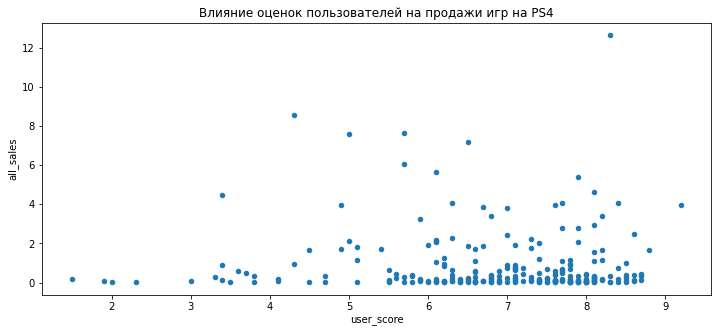

In [35]:
corr_score_user(data, 'PS4') #Оценки пользователей для PS4

Кореляция в даном случае отрицательная, причина может крыться в том, что рост покупок игры может привести к большому количеству негативных комментариев, что в свою очередь может повлиять на продажи в будущем. Так же может быть ситуация: чем покупок больше, тем меньше пользователей ставят оценки оценки.

Зависимость слабая, но есть, значит это не единственный фактор, который влияет на продажи.

,critic_score,all_sales
critic_score,1.000000,0.402661
all_sales,0.402661,1.000000


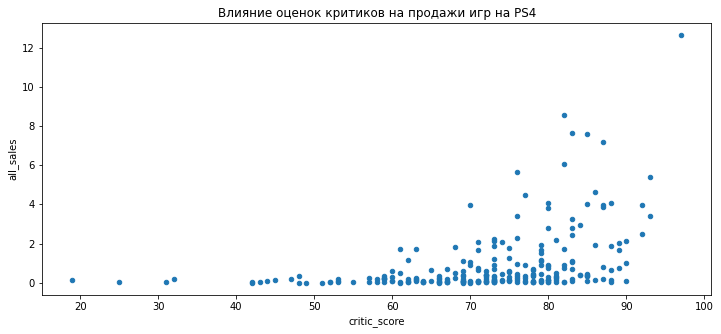

In [36]:
corr_score_critic(data, 'PS4') #Оценки критиков для PS4

Кореляция равна 0.40.

Это говорит о том, что чем выше оценки критиков, тем больше продаж это приносит игре — так же и показывает график. Это объясняется тем, что на оценки критиков смотрят прежде, чем покупают игру.

Кореляция слабая, а значит оценки критиков, не единственный парамент, который влияет на продажи.

,user_score,all_sales
user_score,1.000000,-0.070384
all_sales,-0.070384,1.000000


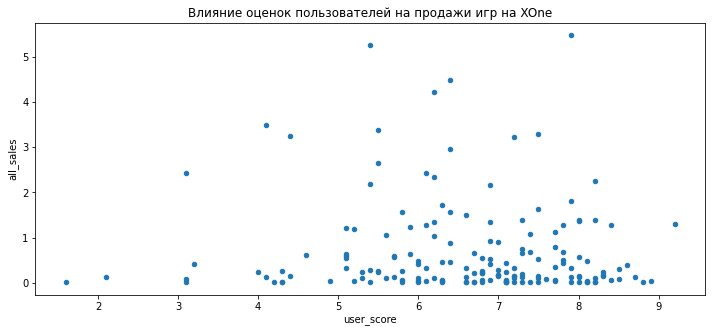

In [37]:
corr_score_user(data, 'XOne') #Оценки пользователей для XOne

Кореляция в даном случае отрицательная и близка к 0, значит, при увеличении оценкок, покупки вряд ли вырастут, срокее останутся на том же уровне.
Кореляция очень слабая, то есть взаимосвязь между оценками пользователей и продажами отсутсвует.

,critic_score,all_sales
critic_score,1.000000,0.428677
all_sales,0.428677,1.000000


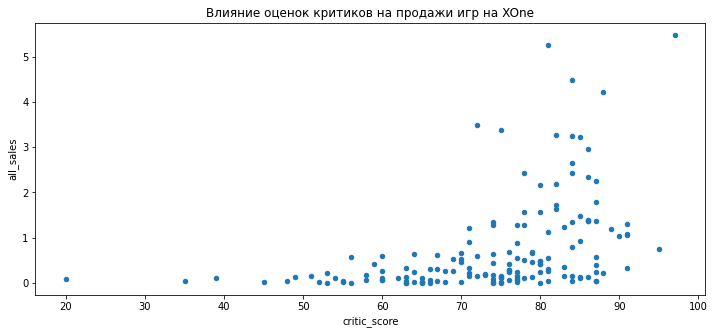

In [38]:
corr_score_critic(data, 'XOne') #Оценки критиков для XOne

Кореляция равна 0.42.

Это говорит о том, что чем выше оценки критиков, тем больше продаж это приносит игре — так же и показывает график. 

Кореляция слабая, а значит оценки критиков, не единственный парамент, который влияет на продажи.

### Какие жанры лидируют по продажам

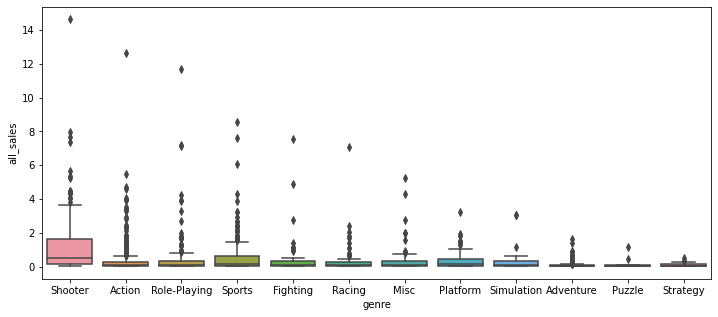

In [39]:
#Посмотрим отличия в продажах по жанрам с выбросами
plt.figure(figsize=(12, 5))
sns.boxplot(x='genre', y='all_sales', data=data)
plt.show()


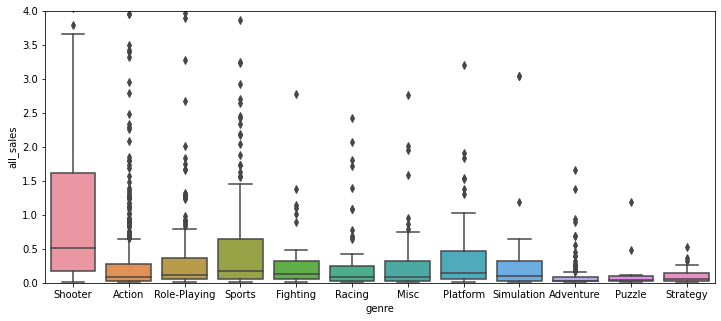

In [40]:
#Посмотрим отличия в по медианам
plt.figure(figsize=(12, 5))
sns.boxplot(x='genre', y='all_sales', data=data)
plt.ylim(0,4)
plt.show()

Жанр Shooter сгруппирован более плотно, чем остальные. А значит устойчивее остальных жанров в продажах.

In [41]:
#Сводная по жанрам
genres = data.pivot_table(index='genre', values='all_sales', aggfunc=['sum','median'])
genres.columns =['Всего продаж','Медиана']
genres.sort_values(by='Всего продаж', ascending=False)

,Всего продаж,Медиана
genre,,
Action,199.36,0.090
Shooter,170.94,0.515
Sports,109.48,0.180
Role-Playing,101.44,0.110
Misc,37.55,0.090
Fighting,28.22,0.125
Racing,27.52,0.090
Platform,18.09,0.140
Adventure,17.55,0.030


При наибольшем количестве продаж в жанре Action, у него одна из низких медиан, значит продажи высокие только в каком-то одном сегменте. А вот у жанра Shooter продаж меньше, но они распределны равномерно.

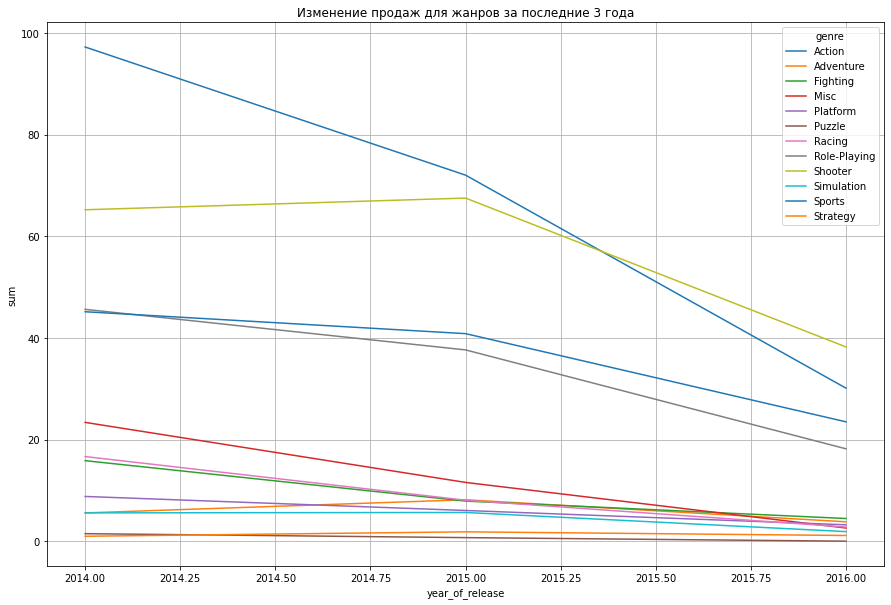

In [42]:
#Строим график продаж за последние 3 года  для жанров
(data
    .pivot_table(index='year_of_release', values='all_sales', columns='genre', aggfunc='sum')
    .plot(grid=True, figsize=(15, 10), title = 'Изменение продаж для жанров за последние 3 года')
)
plt.xlabel('year_of_release') 
plt.ylabel('sum')
plt.show()

Жанр Action стремительно теряет ранок, и Shooter занимает лидирующие позиции

In [43]:
#Посмотрим на как распределны продажи на платформах
data.pivot_table(index='genre', columns='platform', values='all_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,
Action,22.06,5.34,18.10,91.62,0.20,7.47,1.19,9.99,12.33,31.06
Adventure,1.57,0.39,1.98,6.34,0.05,2.29,0.18,0.17,1.90,2.68
Fighting,8.10,0.10,2.89,7.73,NaN,0.69,NaN,5.88,0.66,2.17
Misc,3.85,0.05,6.69,7.77,0.02,3.43,3.14,4.59,1.27,6.74
Platform,3.98,0.06,0.76,5.42,NaN,0.19,NaN,6.87,0.19,0.62
Puzzle,0.87,NaN,0.04,0.02,NaN,0.06,NaN,1.22,NaN,NaN
Racing,NaN,0.64,1.00,10.16,NaN,0.10,NaN,7.09,1.64,6.89
Role-Playing,40.02,4.87,6.63,28.99,NaN,6.10,NaN,1.52,2.76,10.55
Shooter,NaN,5.79,12.17,78.46,NaN,0.64,NaN,4.83,13.66,55.39


Из всех жанров по продажам лидируют: Action, Shooter, Role-Playing и Sports.

Для жанра Action основные продажи сосредоточены на платформе PS4

Для жанра Shooter продажи распределны в основном между PS4 и XOne

Для жанра Role-Playing продажи распределены в основном между 3DS и PS4
 
Для жанра Sports продажи распределны в основном между PS4 и XOne


### Вывод:
Игры стали набирать популярность с 90х годов, когда стало появлется больше платформ.

В 2000 году произошел резкий рост. Пик был в 2008-2009 годах, когда в топе были Wii, DS, X360, PS3. На момент актуального периода исследования только X360 сохранила популярность с 2008-2009 года. PS3  стала терять популярность, как только вышла PS4.

А вот жанров стало больше: к Action и Sports добавились Shooter, Role-Playing. Причем Action по-прежнему занимает лидирующую позицию, а Sports со второго места спустился на 3. А Music сильно сократился в продажах.

Средний возраст жизни платформы - 3 года. На основе этого срока проведен анализ популярных жанров и платформ для рекомендации на 2017 год.

Самый популярный жанр — Action, но его продажи разнятся от платформ на которых он представлен, поэтому большой разброс в данных и низкая медиана. Вероятно, со временем он может стать менее популярным, потому что его опередит жанр Shooter. По последним данным на графике видно, как его продажи упали и находятся ниже жанра Shooter.

Следующий жанр — Shooter. Он занимает второе место по продажам, но его медиана самая высокая. Так как на всех платформах у него близкие показатели по продажам. На графике с данныими о продажах жанр занимает лидирующиую позицию за последнее время, что говорит о его перспективности.

Жанр Sports популярен в основном на PS4 и XOne.

И жанр Role-Playing популярен только на одной платформе, поэтому у него тоже сильный разброс в продажах. Если сравнить ближайший год по распределению продаж по платформам,то 3DS находится выше, чем PS3 и ее график падения продаж более плавный. У PS3 можно отследить резкий спад, как только на рынке появилась PS4. На основе этого делается вывод о том, что перспективы у 3DS более предсказуемы, чем у PS3 и даже PS4, так как они являются одной и той же платформной, которая регулярно обновляется и скоро выйдет новая версия PS5. У 3DS же нет аналогов.  

По итогам исследовательского анализа: 

1. Перспективная платформа для размещения игры — PS4 для любого из популярных (Action, Shooter, Sports, Role-Playing). 
2. Перспективный жанр — Shooter. 
3. Жанр Role-Playing популярен только на одной платформе 3DS.









##  Портрет пользователя регионов

На этом этапе необходимо определить портрет пользователя каждого региона (NA, EU, JP):

- Какие платформы входят в топ 5 в регионах

- Какие жанры входят в топ 5 в регионах

- Как влияет рейтинг ESRB на продажи в отдельном регионе

- Сформулировать вывод

### Какие платформы входят в топ 5 в регионах

In [66]:
#Напишем функцию для построения распределения продаж по регионам
def sales(data, region):
    (data
      .pivot_table(index='platform', values=region, aggfunc='sum')
      .plot(kind='pie',
            figsize=(10,10),
            autopct='%1.1f%%',
            subplots=True)
     )
    return plt.show()

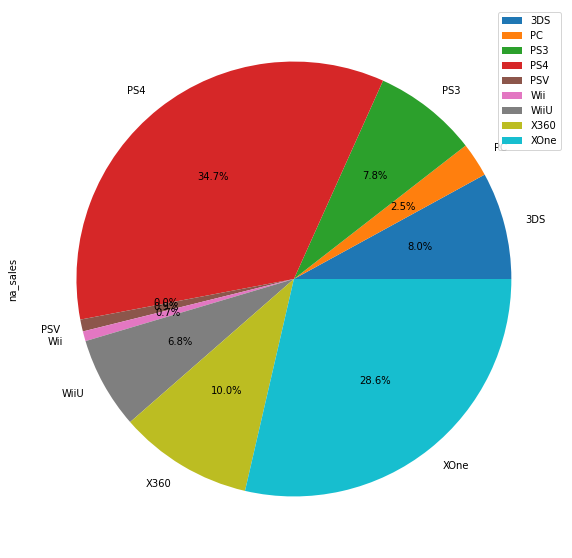

In [67]:
#Северная америка
sales(data, 'na_sales')

В Еверной Америке  топ-5: PS4, XOne, X360, 3DS, PS3. Самая популярная платформа PS4 — она занимает почти 35% рынка. Второе место у XOne - 28,6%.

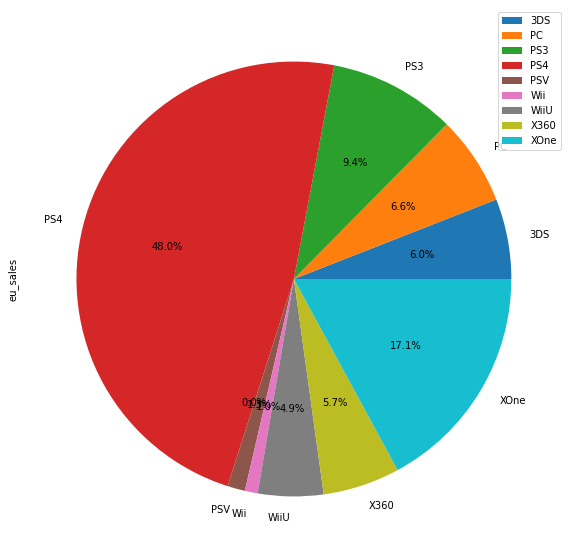

In [68]:
#Европа
sales(data, 'eu_sales')

В Европе самая популярная платорма PS4 (почти 50%), затем идет XOne (17,1%). Топ 5 платформ для региона: PS4, XOne, PS3, PC, 3DS.

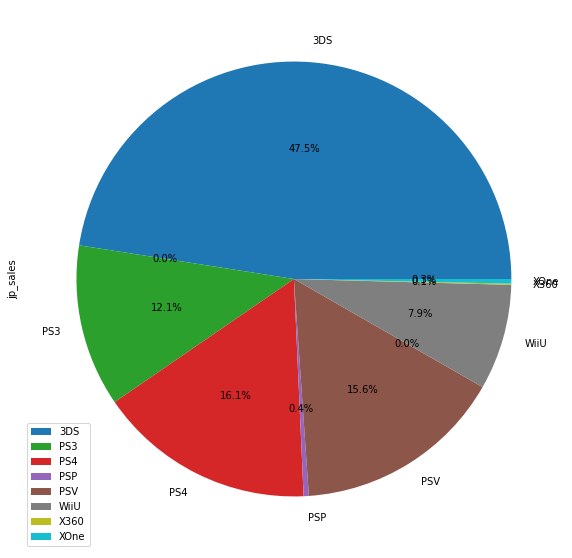

In [69]:
#Япония
sales(data, 'jp_sales')

В Японии самая популярная платформа 3DS почти половина (47,5%) продаж игр на этой платформе, следующая PS4, доля которой почти 16,1%. Топ 5 платформ в регионе: 3DS, PS4, PSV, PS3, WiiU.

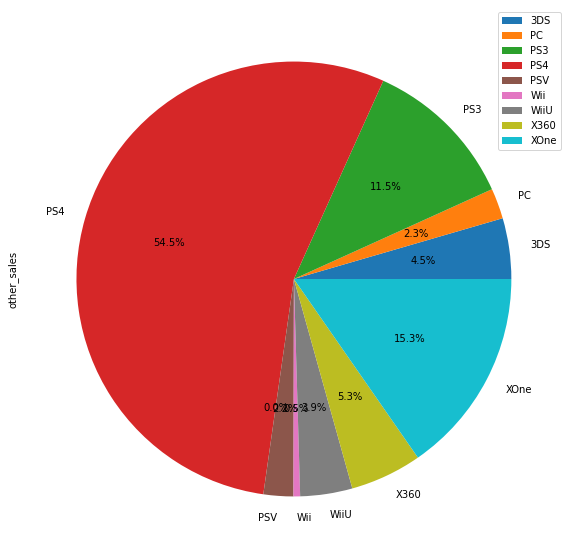

In [70]:
#Другие страны
sales(data, 'other_sales')

В дргугих странах самая популярная платформа PS4 больше половины рынка и она иммет долю больше, чем в других регионах. Топ 5 платформ для региона: PS4, XOne, PS3, X360, 3DS, WiU

### Какие жанры входят в топ 5 в регионах

In [71]:
#Самые популярные жанры в регионах
def genres(data, region):
    (data
      .pivot_table(index='genre', values=region, aggfunc='sum')
      .plot(kind='pie',
            figsize=(10,10),
            autopct='%1.1f%%',
            subplots=True)
     )
    return plt.show()

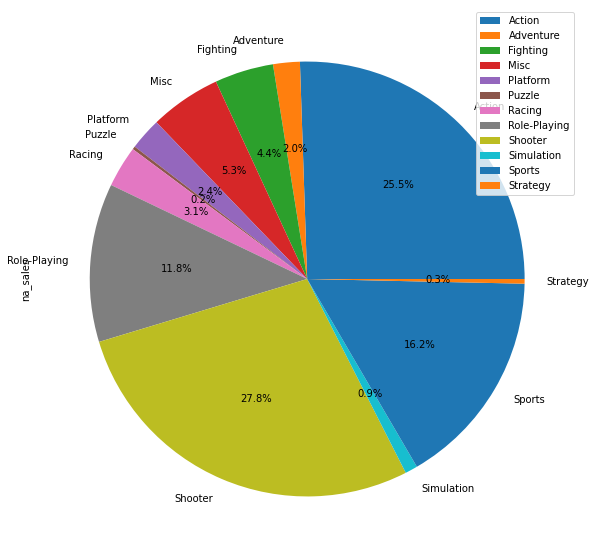

In [72]:
#Северная америка
genres(data, 'na_sales')

Самые популярные жанр — Shooter. Топ 5 жанров: Shooter, Action, Sports, Role-Playing, Music

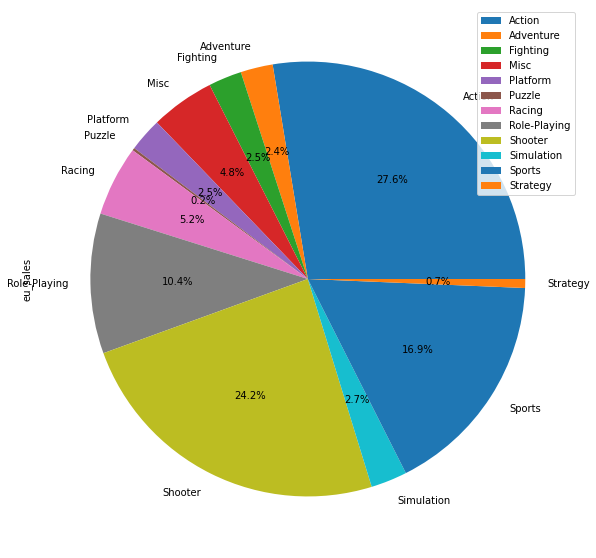

In [73]:
#Европа
genres(data, 'eu_sales')

Самые популярные жанр — Action. Топ 5 жанров: Shooter, Action, Sports, Role-Playing, Music

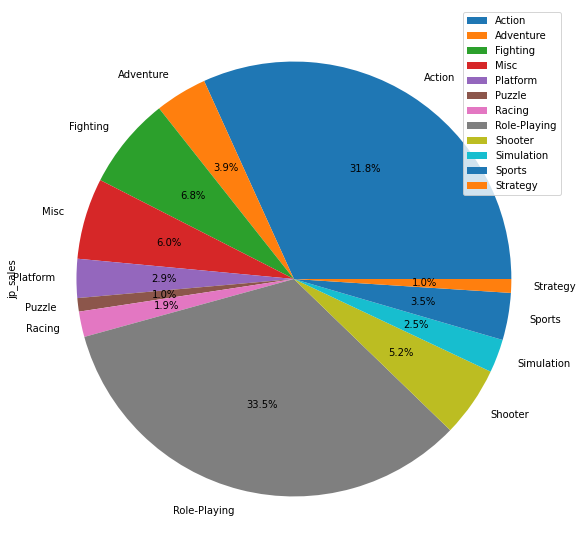

In [74]:
#Япония
genres(data, 'jp_sales')

Самый популярный жанр Role-Playing (33,5%), вероятно это связано с популярной платформной в регионе 3DS, на которой в основном базируется этот жанр. 
Второй по популярности жанр — Action (31,8%).
Топ 5 жанров в регионе: Role-Playing, Action, Music, Fighting, Shooter

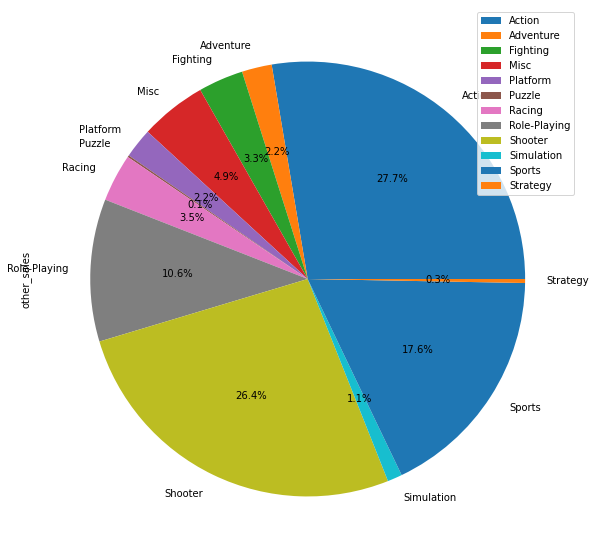

In [75]:
#Другие страны
genres(data, 'other_sales')

Самые популярные жанры Action и Shooter, картина похожа на ситуацию в Северной Америке и Европе. Топ 5 жанров: Action, Shooter, Sports, Role-Playing, Music

### Как влияет рейтинг ESRB на продажи в отдельном регионе

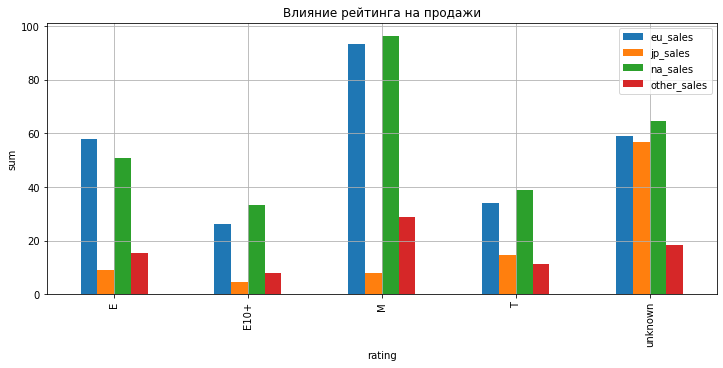

In [76]:
(data
    .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(12,5), title = 'Влияние рейтинга на продажи')
)
plt.xlabel('rating') 
plt.ylabel('sum')
plt.show()

E — для всех

Е10+ — от 10 и старше

М — от 17 и страше

Т - от 13 и старше 

В Северной америке и Европе рейтинг М влияет на продажи — с этим рейтингом самые высокие продажи в отличие от других регионов. Так же в этих регионах, популярны игры без рейтинга(для всех)
Во всех регионах рейтинг Е10+ тоже влияет на продажи, в Японии самые низкие подаже с этим рейтигом, хотя и другие регионы тоже имеют низкие продажи относительно других рейтингов. В Японии в приципе низкие продажи по рейтингам, в отличае от других регионов. Вероятно, там редко продаются продукты из США.

### Вывод:
Портрет пользователя игр получается следующий:

В Северной америке — это пользователь от 17 лет, который играет в основном на платформе PS4, но его друг на  XOne. Пользователь предпочитает жанры игр: Shooter и Action. Чаще играет в Shooter.

В Европе — это пользователь от 17 лет, который играет на платформе PS4. Пользователь играет в жанры Action и Shooter. Чаще играет в Action.

В Японии - это подросток, который играет в 3DS, любит ролевые игры в жанре Role-Playing и Action.

В других странах — это пользователь от 17 лет, который играет на PS4. Пользователь играет в жанр Action и Shooter.
 

## Проверка гипотез

На этом этапе проверяем гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги платформ Xbox One и PS4 одинаковые;

- Средние пользовательские рейтинги жанров Action и Sports разные;

- Средние пользовательские рейтинги жанров Action и Shooter разные;

- Разъяснение формулирования гипотез и выбора критерия проверки гипотез

### Гипотеза 1

Н0 — Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 — Средний пользоватльеский рейтинг платформ Xbox One и PC разные

In [55]:
#Проверим гипотезу
xone = data.loc[data['platform'] == 'XOne']
xone = xone[~(xone['user_score'].isna())]

pc = data.loc[data['platform'] == 'PC']
pc = pc[~(pc['user_score'].isna())]

alpha = 0.05

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC разные

### Гипотеза 2

Н0 — Средний пользоватльеский рейтинг платформ X360 One и PS4 одинаковые

H1 — Средние пользовательские рейтинги платформ X360 и PS4 разные


In [56]:
#Проверим гипотезу
x360 = data.loc[data['platform'] == 'X360']
x360 = x360[~(x360['user_score'].isna())]

ps4 = data.loc[data['platform'] == 'PS4']
ps4 = ps4[~(ps4['user_score'].isna())]

alpha = 0.05

results = st.ttest_ind(
    x360['user_score'], 
    ps4['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.603819044615274e-08
Отвергаем нулевую гипотезу


Средний пользовательский рейтинг платформ X360 One и PS4 одинаковые

### Гипотеза 3

Н0 — Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 - Средние пользовательские рейтинги жанров Action и Sports разные.

In [57]:
#Проверим гипотезу
action = data.loc[data['genre'] == 'Action']
action = action[~(action['user_score'].isna())]
sports = data.loc[data['genre'] == 'Sports']
sports = sports[~(sports['user_score'].isna())]

alpha = 0.05

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports одинаоквые

### Гипотеза 4

Н0 — Средние пользовательские рейтинги жанров Action и Shooter одинаковые. 

Н1 - Средние пользовательские рейтинги жанров Action и Shooter разные.

In [58]:
#Проверим гипотезу
action = data.loc[data['genre'] == 'Action']
action = action[~(action['user_score'].isna())]
shooter = data.loc[data['genre'] == 'Shooter']
shooter = shooter[~(shooter['user_score'].isna())]

alpha = 0.05

results = st.ttest_ind(
    action['user_score'], 
    shooter['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.17296158291043728
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Shooter одинаковые

### Разъяснение формулирования гипотез и выбора критерия проверки гипотез

Сформулированы двусторонние гипотезы, потому что нас интересуют отклонения в обе стороны.

Для проверки гипотез применен критерий Стьюдента, потому что сравниваются средние.

## Общий вывод

Цель нашего исследования — понять, какой продукт запустить и как эффективно потратить рекламный бюджет.  

Что сделано в работе?

1. Данные почищены от пропусков в тех столбцах, где это возможно.
2. Наименования столбцов приведены к нижнему регистру.
3. Проведен анализ по актульаному времени 5 лет на основе медианного срока жизни платформы.
4. Проанализированы зависимоть продаж от оценок критиков и зависимоть от отценок пользователей. 
5. Проанализировано влияние рейтинга на продажи игр.
6. Выведены и проанализированы популярные жанры и платформы для игр.
7. Проанализированы доли продаж популярных жанров и платформ вразных регионах.
8. Сформулированы и проверены гипотезы о средних показателях жанров и платформ.

В исследовании мы проанализировали игры с разных сторон.

Выводы:

1. Для успеха игру стоит разработать для подростка от 17 лет. Если игра планируется для всех регионов, то для США рейтинг можно указать E или М, но не ниже, иначе это может негативно сказаться на продажах. 

2. При разработке игры для пользователя важно учесть региональные особенности.

3. При продвижении игры стоит уделить внимание оценкам критиков. Хорошо, будет использовать их рекомендации в продвижении. Но строить всю рекламную кампанию на интеграции с критиками не стоит, так как они не являются основным фактором продаж.

4. Важно также уделить внимание оценкам пользовталей, вместе с оценками критиков они влияют на продажи игры. Хорошо сработает стимулирование пользователей поставить оценку и получить за это бонус в игре. 

5. Успешная платформа для запуска игры — PS4 везде, кроме Японии.

6. Успешными жанрами для запуска буду: Action и Shooter везде, кроме Японии. На актуальные период исследования средние пользовательские оценки жанра Action и Shooter равны, при меньшем объеме продаж второго. Из чего можно сделать вывод, что популярность жанра растет. Запускаем игру в жанре Shooter.

7. Для Японии необходимо создать отдельный продук для 3DS, так как в этом регионе это самая популярная платформа. Там вообще тенденция на карманные приставки сохраняется давно, даже в не актуальный для исследвания период. Подходящий для этого региона жанр — Role-Playing. В других регионах не распространен. Не стоит выводить на рынок Японии игру в жанре Shooter, так как среди всех регионов жанр является не популярным только в этом регионе. Нотак же можно запускать игрув жанре Action, он второй по популярности в регионе.


